In [1]:
# Imports and basic setup of logging and seaborn
%load_ext autoreload
%autoreload 2
# from __future__ import division
# from __future__ import print_function
import sys, os, logging
import pickle
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import clone
from sklearn.externals.joblib import Parallel, delayed
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

sys.path.append('..')  # Enable importing from package ddl without installing ddl
from ddl.base import CompositeDestructor
from ddl.datasets import make_toy_data
from ddl.deep import DeepDestructorCV, DeepDestructor
from ddl.independent import IndependentDestructor, IndependentDensity, IndependentInverseCdf
from ddl.univariate import ScipyUnivariateDensity, HistogramUnivariateDensity
from ddl.linear import (LinearProjector, RandomOrthogonalEstimator, 
                        BestLinearReconstructionDestructor)
from ddl.autoregressive import AutoregressiveDestructor
from ddl.mixture import GaussianMixtureDensity, FirstFixedGaussianMixtureDensity
from ddl.tree import TreeDestructor, TreeDensity, RandomTreeEstimator
from ddl.externals.mlpack import MlpackDensityTreeEstimator

from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings('ignore', category=DataConversionWarning)

# Setup seaborn
try:
    import seaborn as sns
except ImportError:
    print('Could not import seaborn so colors may be different') 
else:
    sns.set()
    sns.despine()

# Setup logging
logging.basicConfig(stream=sys.stdout)
#logging.captureWarnings(True)
logging.getLogger('ddl').setLevel(logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [6]:
from ddl.visualize import plot_scatter, plot_histograms, plot_layer_scores

import multiprocessing
n_jobs = multiprocessing.cpu_count()
print('n_jobs=%d' % n_jobs)

n_jobs=56


In [11]:
# Setup parameters for experiment
data_name = 'sin_wave'
n_train = 10000
cv = 3  # Number of cv splits
random_state = 0

# Make dataset and create train/test splits
n_samples = 2 * n_train
D = make_toy_data(data_name, n_samples=n_samples, random_state=random_state)
X_train = D.X[:n_train]
y_train = D.y[:n_train] if D.y is not None else None
X_test = D.X[n_train:]
y_test = D.y[n_train:] if D.y is not None else None

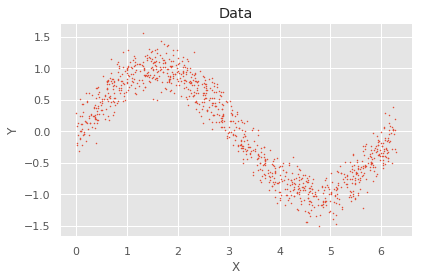

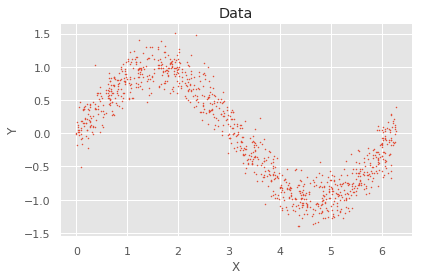

In [12]:
plot_scatter(X_train)
plot_scatter(X_test)
